In [44]:
import pandas as pd
import seaborn as sns
import numpy as np

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


**Preparing the dataset**

Use only the following columns:

- 'engine_displacement',
- 'horsepower',
- 'vehicle_weight',
- 'model_year',
- 'fuel_efficiency_mpg'

In [46]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

**EDA**

Look at the fuel_efficiency_mpg variable. Does it have a long tail?


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

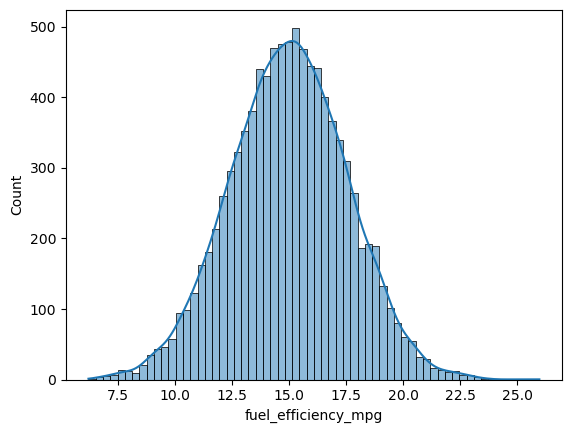

In [48]:
sns.histplot(df.fuel_efficiency_mpg,kde=True)


No we have a perfect normal distribution.

### Question 1
**There's one column with missing values. What is it?**

- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'

In [49]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

The only one column with missing values is 'horsepower' with 708 NaN values.

### Question 2
**What's the median (50% percentile) for variable 'horsepower'?**

- 49
- 99
- 149
- 199

In [50]:
df["horsepower"].median()

149.0

The median is 149.

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use the same code as in the lectures

In [51]:
train_n = int(len(df)*0.6)
val_n = int(len(df)*0.2)
test_n = int(len(df)*0.2)

len(df) , train_n + val_n + test_n, train_n,val_n,test_n

(9704, 9702, 5822, 1940, 1940)

In [52]:
x_train = df.iloc[:train_n]
x_val = df.iloc[train_n: train_n +val_n]
x_test = df.iloc[train_n + val_n:]
len(x_train),len(x_val),len(x_test)

(5822, 1940, 1942)

In [53]:
np.random.seed(42)
idx = np.arange(len(df))
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [54]:
x_train = df.iloc[idx[:train_n]]
x_val = df.iloc[idx[train_n: train_n +val_n]]
x_test = df.iloc[idx[train_n + val_n:]]


In [55]:
x_train.reset_index(drop = True,inplace = True)
x_val.reset_index(drop = True,inplace = True) 
x_test.reset_index(drop = True,inplace = True)

In [56]:
y_train = x_train.fuel_efficiency_mpg.values
y_val = x_val.fuel_efficiency_mpg.values
y_test = x_test.fuel_efficiency_mpg.values

In [57]:
del x_train["fuel_efficiency_mpg"]
del x_val["fuel_efficiency_mpg"]
del x_test["fuel_efficiency_mpg"] 

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

**Which option gives better RMSE?**

Options:

- With 0
- With mean
- Both are equally good

**First option: Filling missing values with 0**

In [58]:
def prepare_data_zero(df):
    df = df.fillna(0)
    X = df.values
    return X

In [59]:
def train_linear_regression(X,y):
    X = np.column_stack((np.ones(X.shape[0], dtype=int), X))
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]


In [60]:
X_train = prepare_data_zero(x_train)
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 260.        ,  139.        , 2606.9729844 , 2009.        ],
       [ 280.        ,  132.        , 4004.21432295, 2014.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ]],
      shape=(5822, 4))

In [61]:
w0 , w = train_linear_regression(X_train,y_train)
w0 , w 

(np.float64(28.81074933114448),
 array([ 9.88022381e-05,  3.54195814e-03, -5.01316573e-03,  3.51135283e-04]))

In [62]:
X_val = prepare_data_zero(x_val)
X_val

array([[ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ],
       [ 180.        ,  112.        , 2772.13441008, 2020.        ],
       ...,
       [ 290.        ,  205.        , 3403.40149596, 2019.        ],
       [ 200.        ,  159.        , 2752.51603879, 2009.        ],
       [ 230.        ,  202.        , 3303.00068812, 2008.        ]],
      shape=(1940, 4))

In [63]:
y_pred = w0 + X_val.dot(w)
y_pred

array([18.78263838, 17.86547128, 16.0373571 , ..., 13.21262979,
       16.30029283, 13.69553919], shape=(1940,))

In [64]:
def rmse(y,y_pred):
    squared_error = (y - y_pred)**2
    mean_squared_error = squared_error.mean()
    return np.sqrt(mean_squared_error)

In [65]:
score = rmse(y_val,y_pred)
round(score,2)

np.float64(0.52)

**Second option: Filling the missing values with training dataset horsepower's mean**

In [66]:
horsepower_mean = x_train["horsepower"].mean()
horsepower_mean

np.float64(149.54348229185982)

In [67]:
x_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [68]:
def prepare_data_mean(df):
    df = df.fillna(horsepower_mean)
    X = df.values
    return X

In [69]:
X_train_mean = prepare_data_mean(x_train)

In [70]:
w0_mean , w_mean  = train_linear_regression(X_train_mean,y_train)
w0_mean , w_mean

(np.float64(28.907110618396892),
 array([ 0.00012034,  0.01030286, -0.00500997, -0.00022574]))

In [71]:
X_val_mean = prepare_data_mean(x_val)
X_val_mean

array([[ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ],
       [ 180.        ,  112.        , 2772.13441008, 2020.        ],
       ...,
       [ 290.        ,  205.        , 3403.40149596, 2019.        ],
       [ 200.        ,  159.        , 2752.51603879, 2009.        ],
       [ 230.        ,  202.        , 3303.00068812, 2008.        ]],
      shape=(1940, 4))

In [72]:
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
y_pred_mean

array([18.77787065, 17.84574511, 15.73839641, ..., 13.54739898,
       16.32580835, 14.01475775], shape=(1940,))

In [74]:
score_mean = rmse(y_val,y_pred_mean)
round(score_mean,2)

np.float64(0.46)

The RMSE score with horsepower's mean on training dataset seems to be better : 0.46<0.52